# Classification Image Data

###### Classify if Image is Cat or Not

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import itertools
import requests
import os.path

# Load Data

##### Download Cat Data


In [13]:
if not(os.path.exists('train_catvnoncat.h5')):
    url="https://manmohan291.s3.ap-south-1.amazonaws.com/CatVsNoCat/train_catvnoncat.h5"
    response = requests.get(url)
    with open('train_catvnoncat.h5', 'wb') as file:
        file.write(response.content)


###### To read H5 File Format, use h5py library 

http://docs.h5py.org/en/stable/build.html

In [35]:
import h5py
train_dataset = h5py.File('train_catvnoncat.h5', "r")
ImgX = np.array(train_dataset["train_set_x"][:]) # your train set features
ImgY = np.array(train_dataset["train_set_y"][:]) # your train set labels

ImgX =These are 209 Images of height 64 and  width 64

ImgY= 0 or 1 Label for cat OR No-cat

In [36]:
ImgX.shape,ImgY.shape

((209, 64, 64, 3), (209,))

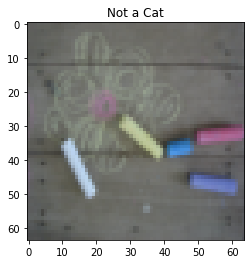

In [37]:
idx=np.random.randint(0,209)
plt.imshow(ImgX[idx])
plt.title( "Cat" if ImgY[idx]==1 else "Not a Cat")
plt.show()

##### Convert Image Data to X Matrix

Each Image has 64 X 64 X 3 = 12288 features


In [39]:
X=ImgX.reshape(209,12288)
Y=ImgY.reshape(209,1)


<h1>Training

In [49]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='log',max_iter=1000, tol=1e-3)
clf.fit(X, Y.flatten())

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

## Prediction/Accuracy Evaluation

### Evaluation on Training Data 

In [50]:
from sklearn.metrics import accuracy_score
pY=clf.predict(X)
print(accuracy_score(Y.flatten(), pY))

0.9904306220095693


### Evaluation on Test Data

In [55]:
if not(os.path.exists('test_catvnoncat.h5')):
    url="https://manmohan291.s3.ap-south-1.amazonaws.com/CatVsNoCat/test_catvnoncat.h5"
    response = requests.get(url)
    with open('test_catvnoncat.h5', 'wb') as file:
        file.write(response.content)

In [61]:
test_dataset = h5py.File('test_catvnoncat.h5', "r")
testImgX = np.array(test_dataset["test_set_x"][:]) # your train set features
testImgY = np.array(test_dataset["test_set_y"][:]) # your train set labels

In [62]:
testX=testImgX.reshape(50,12288)
testY=testImgY.reshape(50,1)
ptestY=clf.predict(testX)
print(accuracy_score(testY.flatten(), ptestY))

0.72


## Confusion Matrix

In [63]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y.flatten(), pY.flatten())
cnf_matrix

array([[136,   1],
       [  1,  71]], dtype=int64)

In [64]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Confusion matrix')
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,rotation=90)
    plt.yticks(tick_marks, classes)

    for i in range(cm.shape[0]):
        for j in (range(cm.shape[1])):
            if cm[i, j] > cm.max() / 2:
                txtclr="white"
            else:
                txtclr="black"
            plt.text(j, i, cm[i, j],horizontalalignment="center",color=txtclr)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
       

    plt.colorbar()
    plt.show()

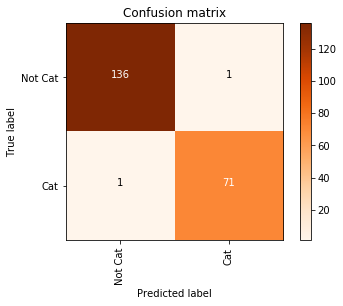

In [65]:
plot_confusion_matrix(cnf_matrix,['Not Cat','Cat'])